<h1>Introduction</h1>
<p>In these lab notes we will introduce you to Naïve Bayes and your task is to implement a relatively simple spam filter.  We will use a small data set to train and test the model (available on Blackboard). </p> 

<b>Note:</b>  Use Jupyter Notebook or Google Colab (NOT Jupyter Lab).
    
<p>The messages within the datasets have already been classified as ham (not spam), or spam. </p> 

<p>The implementation of a Naïve Bayes Spam Filter is relatively straight forward using scikit-learn, however, this library hides the implementation details (and many solutions are available on the Internet).  Therefore, this task does not permit the use of the scikit-learn library or similar libraries that perform similar tasks.  We hope that this will help with your understanding of the implementation details.</p> 
<p>Bayes Theorem can give us the probability that a message is spam S for a given event E</p>

<h1>
$P\left(S\middle|\ E\right)=\frac{P\left(E\middle|\ S\right)P\left(S\right)}{P\left(E\middle|\ S\right)P\left(S\right)+P\left(E|\lnot S\right)P\left(\lnot S\right)}$
</h1>

<p>Where:</p>
<p>$P\left(S\middle|\ E\right)$, the probability that the message is spam given the event occurred.</p>
<p>$P\left(S\right)$, the prior probability that a message is spam.</p>
<p>$P\left(\lnot S\right)$, the prior probability that a message is not spam.  </p>

Note:  $P\left(S\right)$ and $P\left(\lnot S\right)$ are prior values, or prior beliefs.  This value could be calculated using the number of spam and number of ham classifications in the data set.  You could also use arbitrary values, for example; you could assume that of all email messages sent, 80% of them are spam and 20% of them are not spam.  The success of the filter depends on the prior values.

<p>$P\left(E\middle|\ S\right)$, the probability that event E occurs in a spam emails.</p>

<p>$P\left(E|\lnot S\right)$, the probability that event E occurs in non-spam emails.</p>

<h3>Additional Libraries</h3>
<p>As you progress through the exercises you may need additional libraries that are not installed, for example when visualising the data you may need to import WordCloud.  If you use [Google Colaboratory](https://colab.research.google.com/notebooks/intro.ipynb) the necessary libraries will be available, which will save you having to pip install.  </p>
<h3>The Implementation</h3>
<p>We have tried to keep the implementation quite simple and therefore not accounted for things like filtering small often used words, nor does the implementation calculate probabilities of a word in the frequency list not appearing in spam.  We have also filtered things like telephone numbers, which could be used to identify spam.   The final exercise allows you to make recommendations how the model could be improved.    </p>


<h3>1.  Read the dataset into a dataframe and explore</h3>
<p>Start by importing pandas and read the dataset into a DataFrame named df.  Output the first 20 rows of the dataframe to get a general feel of how the data is structured.</p>
<p>You may encounter the error: UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 135-136: invalid continuation byte.  You don't need to edit the datafile.  I was able to successfully read in the datafile by changing the encoding to latin-1.</p>
<p>[1 Mark]</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("spam.csv",encoding='latin-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


<h3>2. Clean the data</h3>
<p>We are only interested in words, clean the data so that all punctuations are removed.  You should be left with a dataset that only contains alpha characters (including spaces).  You should also ensure all the words are lowercase.  Store the cleaned data into a DataFrame named clean.</p>

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Category</th>
      <th>Message</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>ham</td>
      <td>go until jurong point crazy available only in ...</td>
    </tr>
    <tr>
      <th>1</th>
      <td>ham</td>
      <td>ok lar joking wif u oni</td>
    </tr>
    <tr>
      <th>2</th>
      <td>spam</td>
      <td>free entry in  a wkly comp to win fa cup final...</td>
    </tr>
    <tr>
      <th>3</th>
      <td>ham</td>
      <td>u dun say so early hor u c already then say</td>
    </tr>
    <tr>
      <th>4</th>
      <td>ham</td>
      <td>nah i dont think he goes to usf he lives aroun...</td>
    </tr>
  </tbody>
</table>

[2 Marks]

In [3]:
dict={'v1':'Category','v2':'Message'}

In [4]:
import re

df.rename(columns=dict, inplace=True)
clean = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
p = re.compile(r'[^\w\s]+')
clean['Message'] = [p.sub('', x) for x in clean['Message'].tolist()]   #remove all punctuation 
clean['Message'] = clean['Message'].str.lower()  #lowercase all alphabet
clean['Message'] = clean['Message'].str.replace(r'[\d]+', '')  #remove all numbers
clean.head()

/var/folders/kz/k0_p6dhx0lb5myxy10_thxxw0000gn/T/ipykernel_39361/3612886994.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  clean['Message'] = clean['Message'].str.replace(r'[\d]+', '')  #remove all numbers


,Category,Message
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif u oni
2,spam,free entry in a wkly comp to win fa cup final...
3,ham,u dun say so early hor u c already then say
4,ham,nah i dont think he goes to usf he lives aroun...


<h3>3. Split the Data</h3>
<p>Split the data into two random samples, one for training the model and the other for testing the model.  Create DataFrames named train_data and test_data.  The train_data DataFrame should contain 75% of the data and the test_data DataFrame the remaining 25%.<p>  

<p>[1 Mark]</p>

In [5]:
train_data = clean.sample(frac=0.75, random_state=0, axis=0)
train_data

,Category,Message
4456,ham,aight should i just plan to come up later tonight
690,ham,was the farm open
944,ham,i sent my scores to sophas and i had to do sec...
3768,ham,was gr to see that message so when r u leaving...
1189,ham,in that case i guess ill see you at campus lodge
...,...,...
4159,ham,i felt sonot any conveying reason ese he what ...
3218,ham,me too baby i promise to treat you well i bet ...
3409,ham,joys father is john then john is the ____ of j...
4844,ham,missing you toopray inshah allah


In [6]:
test_data = clean[~clean.index.isin(train_data.index)]
test_data

,Category,Message
0,ham,go until jurong point crazy available only in ...
7,ham,as per your request melle melle oru minnaminun...
19,spam,england v macedonia dont miss the goalsteam n...
21,ham,iûm going to try for months ha ha only joking
24,ham,ffffffffff alright no way i can meet up with y...
...,...,...
5555,ham,yeh indians was nice tho it did kane me off a ...
5557,ham,no i meant the calculation is the same that l...
5558,ham,sorry ill call later
5563,ham,ard like dat lor


<h3>4. Create a Word Frequency DataFrame</h3>
<p>Create a new DataFrame named word_freq that contains each word with the number of times it appears in a spam and a ham message.  You should use the train_data not the test_data.</p>
<p>Below is an example of what the DataFrame would look like, <i>note</i> that your values may differ depending on how the data was split.</p>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Word</th>
      <th>#Spam</th>
      <th>#Ham</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>0</td>
      <td>go</td>
      <td>27</td>
      <td>196</td>
    </tr>
    <tr>
      <td>1</td>
      <td>until</td>
      <td>4</td>
      <td>17</td>
    </tr>
    <tr>
      <td>2</td>
      <td>jurong</td>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <td>3</td>
      <td>point</td>
      <td>1</td>
      <td>9</td>
    </tr>
    <tr>
      <td>4</td>
      <td>crazy</td>
      <td>4</td>
      <td>8</td>
    </tr>
    <tr>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
    </tr>
    <tr>
      <td>7253</td>
      <td>salesman</td>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <td>7254</td>
      <td>pity</td>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <td>7255</td>
      <td>soany</td>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <td>7256</td>
      <td>suggestions</td>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <td>7257</td>
      <td>bitching</td>
      <td>1</td>
      <td>0</td>
    </tr>
  </tbody>
</table>
<p>[2 Marks]</p>

In [7]:
all_sentence = train_data['Message'].tolist()
# all_sentence
train_data['Message']

4456    aight should i just plan to come up later tonight
690                                     was the farm open
944     i sent my scores to sophas and i had to do sec...
3768    was gr to see that message so when r u leaving...
1189     in that case i guess ill see you at campus lodge
                              ...                        
4159    i felt sonot any conveying reason ese he what ...
3218    me too baby i promise to treat you well i bet ...
3409    joys father is john then john is the ____ of j...
4844                     missing you toopray inshah allah
1611                                                     
Name: Message, Length: 4179, dtype: object

In [8]:
word_emerge = set()
for i in train_data['Message']:
    temp=i.split()  #split every sentence in all_sentence list
    for word in temp:
        word_emerge.add(word)  #add each word in sentence to word_emerge        

In [9]:
len(word_emerge)

7357

In [10]:
word_emerge

{'werent',
 'pongaldo',
 'kit',
 'typical',
 'dhina',
 'maximize',
 'spoon',
 'chip',
 'splat',
 'sn',
 'vomitin',
 'dear',
 'need',
 'meanwhile',
 'sinco',
 'swalpa',
 'broken',
 'responsibility',
 'fancies',
 'vital',
 'groovying',
 'categories',
 'opt',
 'html',
 'cleared',
 'ruin',
 'after',
 'gifts',
 'subscrition',
 'guy',
 'tsunamis',
 'poking',
 'codexx',
 'schedule',
 'toplay',
 'cashbalance',
 'pound',
 'parking',
 'wt',
 'passion',
 'come',
 'evaporated',
 'fixes',
 'how',
 'wherres',
 'back',
 'queen',
 'cable',
 'fujitsu',
 'havnt',
 'imp',
 'tonesu',
 'finishd',
 'fixed',
 'comb',
 'ltdhelpdesk',
 'bite',
 'green',
 'complete',
 'sib',
 'valuable',
 'europe',
 'ittb',
 'coping',
 'lingo',
 'console',
 'bloodsend',
 'superb',
 'lionm',
 'turns',
 'mates',
 'expects',
 'throw',
 'wiv',
 'laptop',
 'vague',
 'opps',
 'happenin',
 'womdarfull',
 'merely',
 'bec',
 'messenger',
 'hundred',
 'anyplaces',
 'usc',
 'paragon',
 'chikku',
 'guessin',
 'part',
 'luv',
 'nvm',
 'miss

In [11]:
# word_counts_per_message = {unique_word: [0] * len(train_data['Message']) for unique_word in word_emerge}
# lele
word_counts_per_message= train_data['Message']
for unique_word in word_emerge:
    train_data[unique_word] = 0


/var/folders/kz/k0_p6dhx0lb5myxy10_thxxw0000gn/T/ipykernel_39361/799932716.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  train_data[unique_word] = 0


In [12]:
for index,row in train_data.iterrows():
    # print(index,type(row),row['Category'],row['Message']) 
    temp=row['Message'].split()
    for word in temp:
        # print(word,index)
        train_data[str(word)][index] += 1

/var/folders/kz/k0_p6dhx0lb5myxy10_thxxw0000gn/T/ipykernel_39361/458966559.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[str(word)][index] += 1


In [13]:
wordcount_sum = train_data.groupby(train_data.Category,axis=0).sum()
wordcount_sum.head()

,werent,pongaldo,kit,typical,dhina,maximize,spoon,chip,splat,sn,...,sales,travelled,dateboxessexcmxn,wendy,messageits,asshole,mon,docs,series,åk
Category,,,,,,,,,,,,,,,,,,,,,
ham,1,1,0,1,1,0,1,2,1,1,...,1,1,0,1,2,1,7,1,3,0
spam,0,0,1,0,0,6,0,0,0,1,...,0,0,2,0,0,0,0,0,0,1


In [14]:
word_freq = wordcount_sum.T

In [15]:
word_freq = word_freq.sort_values('ham',ascending=[False]) #Sort the word frequency according to ham value.

In [16]:
word_freq = word_freq.reset_index(drop=False)
dict_word_freq = {'ham':'#Ham','spam':'#Spam'}
word_freq.rename(columns=dict_word_freq, inplace=True)

In [17]:
dict_word_freq1 = {'index':'Word'}
word_freq.rename(columns=dict_word_freq1, inplace=True)
word_freq

Category,Word,#Ham,#Spam
0,i,1625,42
1,you,1353,218
2,to,1172,523
3,the,834,162
4,a,816,276
...,...,...,...
7352,boltblue,0,1
7353,txtauction,0,4
7354,wither,0,1
7355,åweek,0,1


<h3>5. Visualise the Data</h3>
<p>Let's use a Word Cloud library to visualise the most common words contained in spam messages.</p>

[Example of a Word Cloud Image](https://drive.google.com/open?id=1lVRGHtMB1AMJf-JSi7MmcHbZB_BvBhGC)

<p>[3 Marks]</p>



In [18]:
most_spam = word_freq.sort_values(by = ['#Spam'], ascending=[False]).head(30)

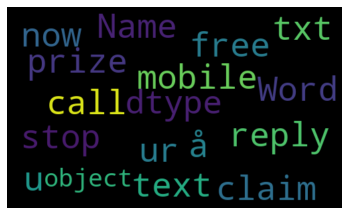

In [19]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text = str(most_spam['Word'])
wordcloud = WordCloud(width=500, height=300,max_font_size=50, max_words=75, background_color="black").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

<h3>6.  Calculate $P\left(E\middle| S\right)$ and $P\left(E|\lnot S\right)$</h3>
<p>Next create a new DataFrame named word_prob that gives the probability of each word being found in a spam and ham message.</p>
<p>To calculate the probability of a word being spam you divide the number of times the word was found in spam by the total number of spam messages, likewise to calculate the probability of each word being found in a ham message you divide the number of times the word was found in a ham message by the total number of ham messages.</p>
<p>If a word was not found in ham or spam it will cause problems later because the probability calculated will be zero. Therefore, use a pseudocount k and estimate the probability of seeing the word. This is known as smoothing and results in the following formula when k = 0.5, for example.</p>
<p>$P\left(E\middle| S\right)$ = (number of spams containing the word + k) / (total number of spam messages + 2 * k).</p>
<p>Likewise, for $P\left(E|\lnot S\right)$.</p>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Word</th>
      <th>P(E|S)</th>
      <th>P(E|¬S)</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>go</td>
      <td>0.053322</td>
      <td>0.050055</td>
    </tr>
    <tr>
      <th>1</th>
      <td>until</td>
      <td>0.011364</td>
      <td>0.004275</td>
    </tr>
    <tr>
      <th>2</th>
      <td>jurong</td>
      <td>0.002622</td>
      <td>0.000138</td>
    </tr>
    <tr>
      <th>3</th>
      <td>point</td>
      <td>0.002622</td>
      <td>0.002344</td>
    </tr>
    <tr>
      <th>4</th>
      <td>crazy</td>
      <td>0.011364</td>
      <td>0.002344</td>
    </tr>
  </tbody>
</table>
</p>[2 Marks]</p>


In [20]:
#𝑃(𝐸|𝑆)  = (number of spams containing the word + k) / (total number of spam messages + 2 * k)

k = 0.5
#Create an empty list
prob_list = [] 
#The number of spam or ham message in train_data
spam_number_train = len(train_data[train_data["Category"] == "spam"])
ham_number_train = len(train_data[train_data["Category"] == "ham"])

for i in word_freq.index:
    prob_list.append((word_freq.loc[i, "Word"],
                     (word_freq.loc[i, "#Spam"] + k) / (spam_number_train + 2*k),
                     (word_freq.loc[i, "#Ham"] + k) / (ham_number_train + 2*k)))
    
#Output the dataframe
word_prob = pd.DataFrame(prob_list, columns=["Word", "P(E|S)", "P(E|¬S)"])
word_prob    

,Word,P(E|S),P(E|¬S)
0,i,0.075221,0.449530
1,you,0.386726,0.374309
2,to,0.926549,0.324253
3,the,0.287611,0.230780
4,a,0.489381,0.225802
...,...,...,...
7352,boltblue,0.002655,0.000138
7353,txtauction,0.007965,0.000138
7354,wither,0.002655,0.000138
7355,åweek,0.002655,0.000138


<h3>7. Checking the 'spamliness' of a single word</h3>
<p>Now that we have trained the model, we will test the model.  Before we use the test_data, first let’s check how the model calculates the spamliness of a single word.  This is where we use the Bayes Theorem formula.  We have already calculated $P\left(E\middle| S\right)$ and $P\left(E|\lnot S\right)$, so we can just extract these values from the word_prob DataFrame.</p>
<p>We need to decide on the prior values $P\left(S\right)$ and $P\left(\lnot S\right)$, this is where you can experiment and tweak the model, in this example the prior value for spam was set to $0.4$ and the prior value for not spam or ham was set to $0.6$.</p>
<h3>
$P\left(S\middle|\ E\right)=\frac{P\left(E\middle|\ S\right)P\left(S\right)}{P\left(E\middle|\ S\right)P\left(S\right)+P\left(E|\lnot S\right)P\left(\lnot S\right)}$
</h3>
<pre>
Output
Word = ['free']
P(E|S) = [0.29108392]
P(E|¬S) = [0.01365141]
P(S|E) = [0.93427577]
P(¬S|E) = [0.06572423]
</pre>

<p>[2 Marks]</p>

In [21]:
num_spam = 0
num_ham = 0
for i in train_data['Category']:
    if i == 'spam':
        num_spam += 1
    else:
        num_ham += 1
num_all = num_spam + num_ham
PS = num_spam/num_all
PnotS = num_ham/num_all
index_to = word_freq[word_freq.Word == 'to'].index.tolist()[0]
PES_to = word_prob.iloc[index_to][1]
PEnotS_to = word_prob.iloc[index_to][2]
PSE_to = round((PES_to*PS)/(PES_to*PS+PEnotS_to*PnotS), 7)
print('Word = [\'to\']'+'\n'+'P(E|S) = ['+str(PES_to)+']'+'\n'+'P(E|¬S) = ['+str(PEnotS_to)+']'+'\n'+
     'P(S|E) = ['+str(PSE_to)+']'+'\n'+'P(¬S|E) = ['+str(1-PSE_to)+']')

Word = ['to']
P(E|S) = [0.9265486725663716]
P(E|¬S) = [0.3242533185840708]
P(S|E) = [0.3083485]
P(¬S|E) = [0.6916515]


<h3>8. Checking the 'spamliness' of several words</h3>
<p>To check the spamliness of several words contained in a message we multiply the probabilities.  The model assumes the words appear as independent events hence the naïve Bayes.  In reality of course, words are not independent events, but the model still performs well.  So we use the assumption that the words appear independently, and hence we multiply probabilities, so
$P(S\,|\, x_1,\dots,x_n)\approx \frac{P(S)\underset{i=1}{\overset{n}{\prod}}P(x_i | S)}{P(S)\underset{i=1}{\overset{n}{\prod}}P(x_i | S)+P(\neg S)\underset{i=1}{\overset{n}{\prod}}P(x_i | \neg S)}$

Calculate the probability for each word in a message being spam, you might want to store the calculations in a list named prob_spam.  Likewise create a list for each word not being spam.
Then multiply the probabilities and compare the results.  If the result of multiplying the probabilities for spam is greater than the result of multiplying the probabilities for not spam, then you assume the message as spam.
</p>
<p>If you have a word in your message that is not in the word_prob DataFrame then you can't get the probability.  Skip any words in the message that are not in the word_prob DataFrame.</p>
<p>[2 Marks]</p>

In [22]:
testedMessage = "Before practising the Mock exam, it is highly recommended that you practice the STACK quiz, which will help you to understand how the quiz tool works and in what format the exam will be."
emptyMessage = ""
for i in testedMessage:
    if i.isalpha() or i == " ":
        emptyMessage += i
testedMessage = emptyMessage.lower().split()

prob_spam = float((spam_number_train + k) / (len(train_data) + 2 * k))
prob_ham = float((ham_number_train + k) / (len(train_data) + 2 * k))

for word in testedMessage:
    # if the word is not found in word_prob dataframe, just skip it
    if not (word_prob['Word'] == word).any():
        continue
    prob_spam *= float(word_prob[word_prob['Word'] == word]['P(E|S)'])
    prob_ham *= float(word_prob[word_prob['Word'] == word]['P(E|¬S)'])
print("prob_spam (numerator):", prob_spam)
print("prob_ham (numerator):", prob_ham)



spam_and_ham = prob_spam + prob_ham
# calculate probability
prob_spam = prob_spam/spam_and_ham
prob_ham = prob_ham/spam_and_ham
# output
print("prob_spam:", prob_spam)
print("prob_ham:", prob_ham)
if float(prob_spam) > float(prob_ham):
    print("This is a spam message.")
else:
    print("This is a ham message.")

prob_spam (numerator): 3.174510417249189e-50
prob_ham (numerator): 9.129332539457551e-53
prob_spam: 0.9971324228691191
prob_ham: 0.002867577130880975
This is a spam message.


<h3>9. Avoiding floating point underflow</h3>
<p>Our aim is to compare two probabilities $P(S|x_1,\dots,x_n)$ with $P(\neg S|x_1,\dots,x_n),$ according to our model introduced in Section 8, both probabilities share a common denominator which does not affect comparison. Hence we will calculate numerators only, which are proportional to $P(S|x_1,\dots,x_n)$ and $P(\neg S|x_1,\dots,x_n).$
</p>

<p>Multiplying a set of small probabilities could result in a floating-point error.  This is where the product becomes too small to be represented correctly.  To avoid this we can take the logarithm of the probabilities and add them.  

To avoid multiplication of small numbers, we use the following property of $\log(x):$</p>
$$
\log(a\cdot b)=\log(a)+\log(b)
$$
<p>i.e. the log of the product is equal to the sum of logs (so instead of multiplying small numbers we will add them):</p>
$$
P(S|x_1,x_2,\dots,x_n)\propto P(S)\cdot P(x_1|S)\cdot \dots \cdot P(x_n|S)$$
<p>becomes</p>
$$\log(P(S|x_1,x_2,\dots,x_n))\propto \log\left(P(S)\cdot P(x_1|S)\cdot \dots  P(x_n|S)\right)=$$ $$
\log(P(S))+\log(P(x_1|S))+\dots+\log(P(x_n|S))
$$
<p>So, to check spam or ham we just compare:</p>
$$
\log(P(S))+\log(P(x_1|S))+\dots+\log(P(x_n|S))
$$
<p>and </p>
$$
\log(P(\neg S))+\log(P(x_1|\neg S))+\dots+\log(P(x_n|\neg S))
$$


Change the equation so that logs are used.
</p>
<p>[1 Mark]</p>

In [23]:
from math import log2

testedMessage = "Before practising the Mock exam, it is highly recommended that you practice the STACK quiz, which will help you to understand how the quiz tool works and in what format the exam will be."
emptyMessage = ""
for i in testedMessage:
    if i.isalpha() or i == " ":
        emptyMessage += i
testedMessage = emptyMessage.lower()


In [24]:
def spam_log(message, underflow=False):
    # Calculate log_prob_spam and log_prob_ham
    log_prob_spam = log2(float((spam_number_train + k) / (len(train_data) + 2 * k)))
    log_prob_ham = log2(float((ham_number_train + k) / (len(train_data) + 2 * k)))
    
    message = message.split()
    for word in message:
         # if the word is not found in word_prob dataframe, just skip it
        if not (word_prob['Word'] == word).any():
            continue
            
        log_prob_spam += log2(float(word_prob[word_prob['Word'] == word]['P(E|S)']))
        log_prob_ham += log2(float(word_prob[word_prob['Word'] == word]['P(E|¬S)']))  
        
    if underflow:
        print("log_prob_spam (numerator):", log_prob_spam)
        print("log_prob_ham (numerator):", log_prob_ham)
    return 'spam' if float(log_prob_spam) > float(log_prob_ham) else 'ham' 

if spam_log(testedMessage, underflow=True) == 'spam':
    print("This is a spam message.")
else:
    print("This is a ham message.")
    

log_prob_spam (numerator): -164.42987063219016
log_prob_ham (numerator): -172.8716796427763
This is a spam message.


<h3>10. Testing the Model</h3>
<p>Now that we have tested the model using simple messages.  Let’s test the model using the messages from the test_set.  You should implement counters that displays how your model has performed and calculate the accuracy of the model.</p>
<pre>
match_spam 173
match_ham 843
thought_ham_is_spam 3
thought_spam_is_ham 357
Accuracy: 0.7383720930232558
</pre>
<p>[3 Marks]</p>


In [25]:
match_spam=0
match_ham=0
thought_ham_is_spam=0
thought_spam_is_ham=0

for i in test_data.index:
    if spam_log(test_data.loc[i, 'Message']) == 'spam':
        if test_data.loc[i, 'Category'] == 'spam':
            match_spam += 1
        else:
            thought_ham_is_spam += 1
            
    else:
        if test_data.loc[i, 'Category'] == 'ham':
            match_ham += 1
        else:
            thought_spam_is_ham += 1
                
print('match_spam', match_spam)
print('match_ham', match_ham)
print('thought_ham_is_spam', thought_ham_is_spam)
print('thought_spam_is_ham', thought_spam_is_ham)
print('Accuracy:', (match_spam + match_ham) / len(test_data.index))            

match_spam 177
match_ham 1134
thought_ham_is_spam 76
thought_spam_is_ham 6
Accuracy: 0.9411342426417804


<h3>11. Improvements</h3>
<p>Give some suggestions or recommendations on how the accuracy of the model could be improved.</p>
<p>[1 Mark]</p>

1. Consider more typical characteristics of spam，like phone number, wedsite address

2. We could use a larger dataset improving the accuracy. However, it is the test for CPU.

<h3></h3>